<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='Figures/alinco.png' width="120"/>
<h1 style="color:#000047;">Tarea 3: Algoritmos de detección de Outliers Multivariados</h1>
<br style="clear:both"/>
</div>


<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Investigar y entender algunos de los algoritmos que se usan para detección de outliers.
</div>

<div style="border-left:6px solid #003366; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#003366; margin-top:0;">1. Local Outlier Factor (LOF) <span style='font-size:0.8em; color:#888;'>&#128200;</span></h3>
<p style="font-size:1.08em;">
El <b>Local Outlier Factor (LOF)</b> es un algoritmo no supervisado que detecta anomalías comparando la densidad local de cada punto con la de sus vecinos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.
</p>
<ul style="font-size:1.05em;">
<li>Consulta el artículo original: <a href="https://dl.acm.org/doi/pdf/10.1145/335191.335388" target="_blank">LOF paper</a></li>
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo LOF y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo LOF de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Presenta tus resultados con gráficos y tablas para facilitar la comparación.
</div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor as LOF_sklearn
from HyAIA import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
df = pd.read_csv('Data/insurance.csv')
print(f"Shape: {df.shape}")
df.head()


Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_processed = df.copy()

le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_processed['sex'] = le_sex.fit_transform(df_processed['sex'])
df_processed['smoker'] = le_smoker.fit_transform(df_processed['smoker'])
df_processed['region'] = le_region.fit_transform(df_processed['region'])

df_processed.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)


In [5]:
lof_custom = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels_custom = lof_custom.fit_predict(X_scaled)
lof_scores_custom = lof_custom.get_lof_scores()

n_outliers_custom = np.sum(labels_custom == -1)
n_inliers_custom = np.sum(labels_custom == 1)

print("Implementación propia:")
print(f"Outliers: {n_outliers_custom} ({n_outliers_custom/len(labels_custom)*100:.2f}%)")
print(f"Inliers: {n_inliers_custom} ({n_inliers_custom/len(labels_custom)*100:.2f}%)")


Implementación propia:
Outliers: 134 (10.01%)
Inliers: 1204 (89.99%)


In [6]:
lof_sklearn = LOF_sklearn(n_neighbors=20, contamination=0.1)
labels_sklearn = lof_sklearn.fit_predict(X_scaled)
lof_scores_sklearn = -lof_sklearn.negative_outlier_factor_

n_outliers_sklearn = np.sum(labels_sklearn == -1)
n_inliers_sklearn = np.sum(labels_sklearn == 1)

print("Sklearn:")
print(f"Outliers: {n_outliers_sklearn} ({n_outliers_sklearn/len(labels_sklearn)*100:.2f}%)")
print(f"Inliers: {n_inliers_sklearn} ({n_inliers_sklearn/len(labels_sklearn)*100:.2f}%)")


Sklearn:
Outliers: 134 (10.01%)
Inliers: 1204 (89.99%)


In [7]:
comparison_data = {
    'Métrica': ['Outliers', 'Inliers', 'LOF max', 'LOF min', 'LOF mean'],
    'Propia': [
        n_outliers_custom,
        n_inliers_custom,
        f"{np.max(lof_scores_custom):.3f}",
        f"{np.min(lof_scores_custom):.3f}",
        f"{np.mean(lof_scores_custom):.3f}"
    ],
    'Sklearn': [
        n_outliers_sklearn,
        n_inliers_sklearn,
        f"{np.max(lof_scores_sklearn):.3f}",
        f"{np.min(lof_scores_sklearn):.3f}",
        f"{np.mean(lof_scores_sklearn):.3f}"
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

same_predictions = np.sum(labels_custom == labels_sklearn)
print(f"\nCoincidencias: {same_predictions}/{len(labels_custom)}")


 Métrica Propia Sklearn
Outliers    134     134
 Inliers   1204    1204
 LOF max  1.754   1.754
 LOF min  0.922   0.922
LOF mean  1.058   1.058

Coincidencias: 1338/1338


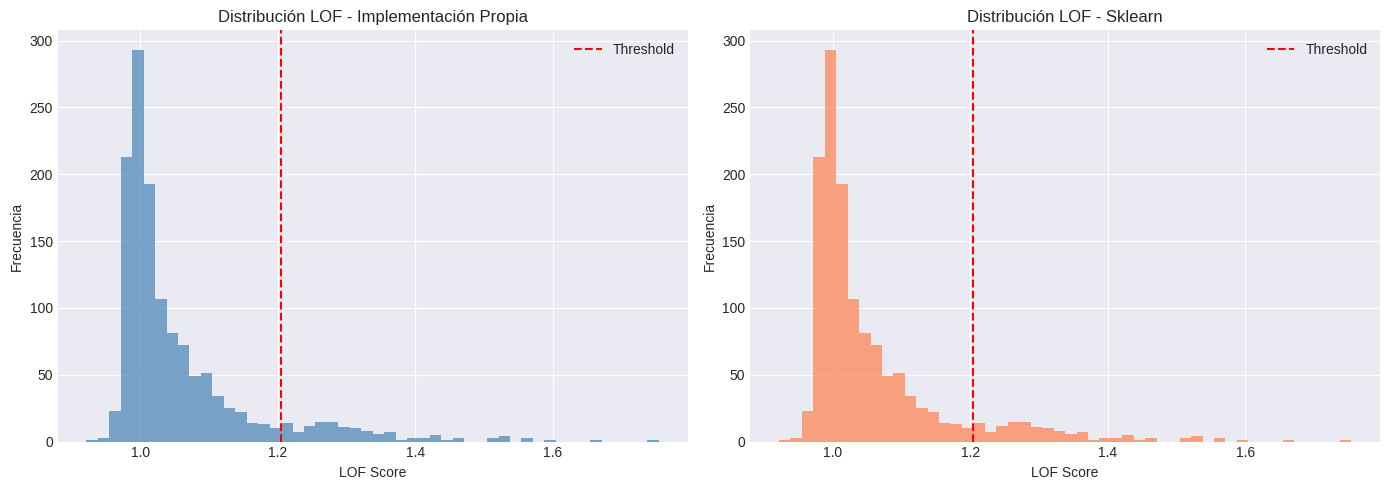

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(lof_scores_custom, bins=50, alpha=0.7, color='steelblue')
axes[0].axvline(lof_custom.threshold_, color='red', linestyle='--', label=f'Threshold')
axes[0].set_xlabel('LOF Score')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución LOF - Implementación Propia')
axes[0].legend()

axes[1].hist(lof_scores_sklearn, bins=50, alpha=0.7, color='coral')
axes[1].axvline(np.percentile(lof_scores_sklearn, 90), color='red', linestyle='--', label='Threshold')
axes[1].set_xlabel('LOF Score')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución LOF - Sklearn')
axes[1].legend()

plt.tight_layout()
plt.show()


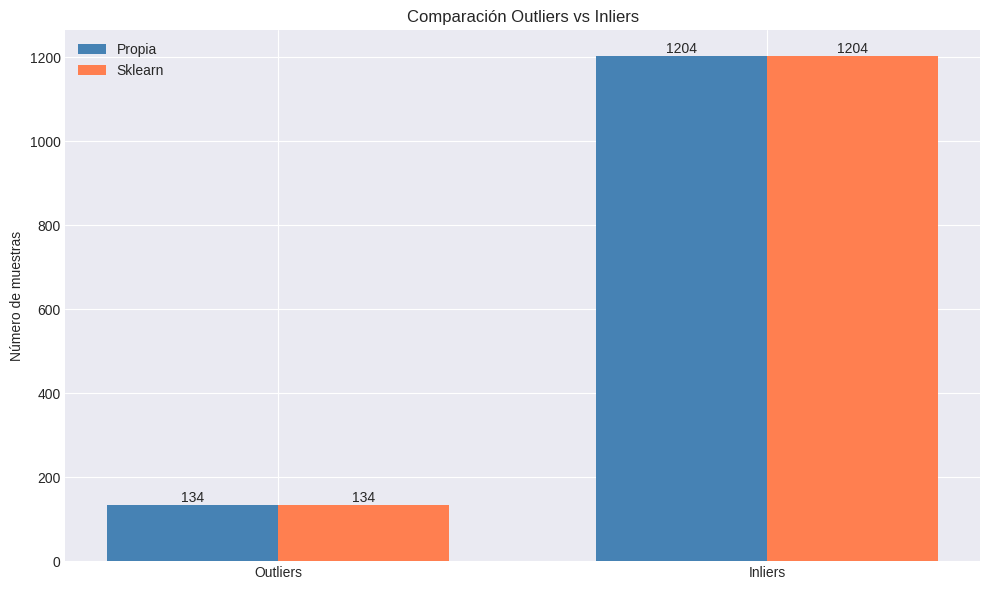

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Outliers', 'Inliers']
custom_values = [n_outliers_custom, n_inliers_custom]
sklearn_values = [n_outliers_sklearn, n_inliers_sklearn]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, custom_values, width, label='Propia', color='steelblue')
bars2 = ax.bar(x + width/2, sklearn_values, width, label='Sklearn', color='coral')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
                ha='center', va='bottom')

ax.set_ylabel('Número de muestras')
ax.set_title('Comparación Outliers vs Inliers')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


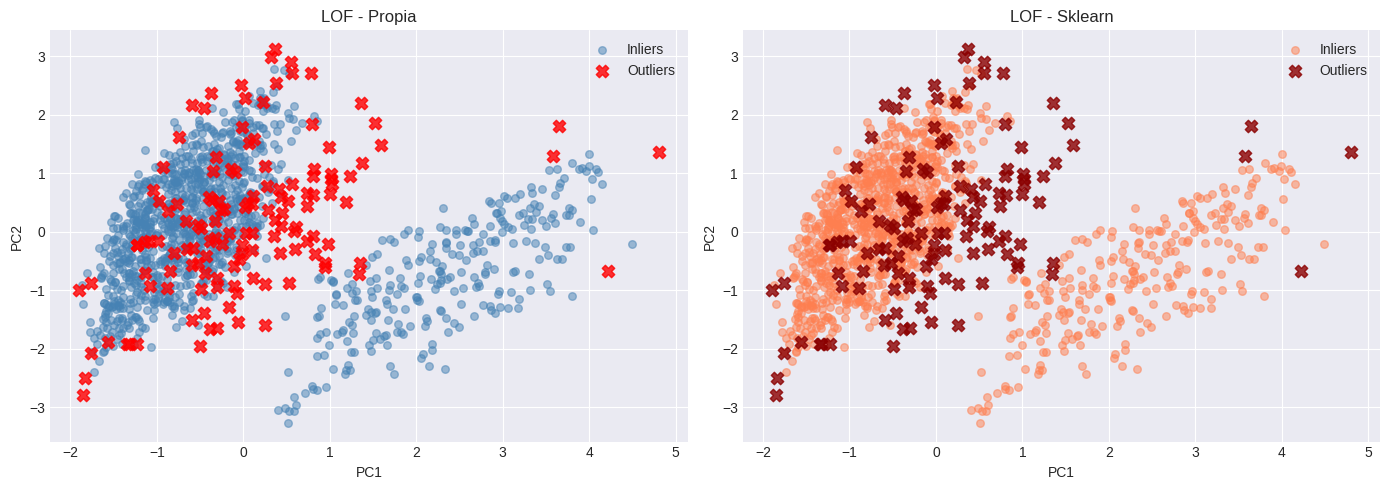

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_pca[labels_custom == 1, 0], X_pca[labels_custom == 1, 1], 
                c='steelblue', alpha=0.5, s=30, label='Inliers')
axes[0].scatter(X_pca[labels_custom == -1, 0], X_pca[labels_custom == -1, 1], 
                c='red', alpha=0.8, s=80, label='Outliers', marker='X')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('LOF - Propia')
axes[0].legend()

axes[1].scatter(X_pca[labels_sklearn == 1, 0], X_pca[labels_sklearn == 1, 1], 
                c='coral', alpha=0.5, s=30, label='Inliers')
axes[1].scatter(X_pca[labels_sklearn == -1, 0], X_pca[labels_sklearn == -1, 1], 
                c='darkred', alpha=0.8, s=80, label='Outliers', marker='X')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('LOF - Sklearn')
axes[1].legend()

plt.tight_layout()
plt.show()


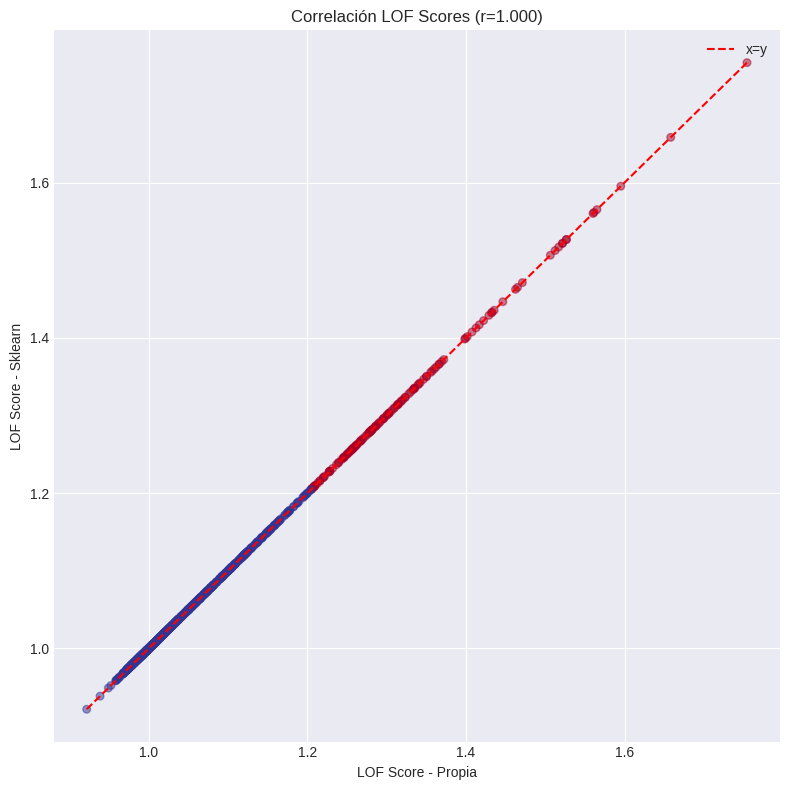

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(lof_scores_custom, lof_scores_sklearn, 
                     c=labels_custom, cmap='RdYlBu', s=30, alpha=0.5)

min_val = min(lof_scores_custom.min(), lof_scores_sklearn.min())
max_val = max(lof_scores_custom.max(), lof_scores_sklearn.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y')

correlation = np.corrcoef(lof_scores_custom, lof_scores_sklearn)[0, 1]

ax.set_xlabel('LOF Score - Propia')
ax.set_ylabel('LOF Score - Sklearn')
ax.set_title(f'Correlación LOF Scores (r={correlation:.3f})')
ax.legend()

plt.tight_layout()
plt.show()


In [12]:
df_results = df.copy()
df_results['LOF_Score'] = lof_scores_custom
df_results['Outlier'] = (labels_custom == -1)

print("Top 10 outliers:")
top_outliers = df_results.nlargest(10, 'LOF_Score')[
    ['age', 'sex', 'bmi', 'smoker', 'charges', 'LOF_Score']
]
print(top_outliers.to_string(index=False))


Top 10 outliers:
 age    sex    bmi smoker     charges  LOF_Score
  18   male 53.130     no  1163.46270   1.754415
  24 female 23.210     no 25081.76784   1.658242
  23   male 18.715     no 21595.38229   1.595284
  19   male 33.100     no 23082.95533   1.565185
  35   male 39.710     no 19496.71917   1.561511
  18 female 30.115     no 21344.84670   1.560228
  22   male 52.580    yes 44501.39820   1.526725
  33   male 42.400     no  6666.24300   1.526636
  61 female 33.330     no 36580.28216   1.521811
  55 female 26.800     no 35160.13457   1.521668


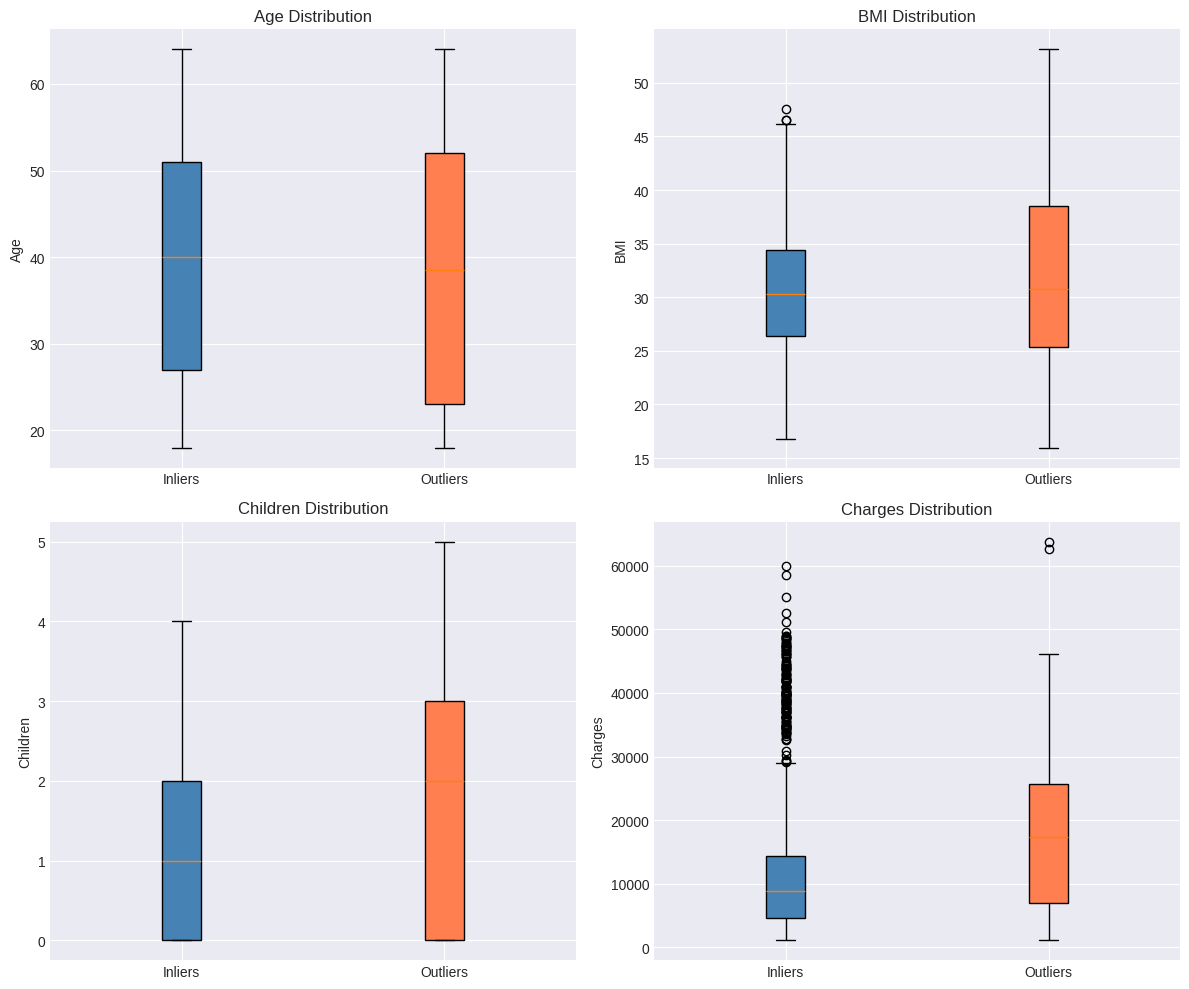

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

numeric_vars = ['age', 'bmi', 'children', 'charges']
titles = ['Age', 'BMI', 'Children', 'Charges']

for idx, (var, title) in enumerate(zip(numeric_vars, titles)):
    row = idx // 2
    col = idx % 2
    
    data_to_plot = [
        df_results[df_results['Outlier'] == False][var],
        df_results[df_results['Outlier'] == True][var]
    ]
    
    bp = axes[row, col].boxplot(data_to_plot, labels=['Inliers', 'Outliers'],
                                 patch_artist=True)
    
    colors = ['steelblue', 'coral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[row, col].set_ylabel(title)
    axes[row, col].set_title(f'{title} Distribution')

plt.tight_layout()
plt.show()


<div style="border-left:6px solid #b36b00; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#b36b00; margin-top:0;">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <span style='font-size:0.8em; color:#888;'>&#128201;</span></h3>
<p style="font-size:1.08em;">
<b>DBSCAN</b> es un algoritmo de clustering basado en densidad que agrupa puntos cercanos y considera como outliers (ruido) aquellos que no pertenecen a ningún grupo. A diferencia de K-means, no requiere especificar el número de clusters previamente.
</p>
<ul style="font-size:1.05em;">
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo DBSCAN y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo DBSCAN de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#fffbe6; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Explica brevemente las diferencias entre los resultados obtenidos por tu clase y los de <code>sklearn</code>.
</div>
</div>

In [14]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from HyAIA import DBSCAN

dbscan_custom = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan_custom = dbscan_custom.fit_predict(X_scaled)
outliers_custom = dbscan_custom.get_outliers()
n_clusters_custom = dbscan_custom.get_n_clusters()

print("Implementación propia:")
print(f"Clusters encontrados: {n_clusters_custom}")
print(f"Outliers: {len(outliers_custom)} ({len(outliers_custom)/len(X_scaled)*100:.2f}%)")
print(f"Puntos en clusters: {len(X_scaled) - len(outliers_custom)}")


Implementación propia:
Clusters encontrados: 4
Outliers: 14 (1.05%)
Puntos en clusters: 1324


In [15]:
dbscan_sklearn = DBSCAN_sklearn(eps=1.5, min_samples=5)
labels_dbscan_sklearn = dbscan_sklearn.fit_predict(X_scaled)
outliers_sklearn = np.where(labels_dbscan_sklearn == -1)[0]
n_clusters_sklearn = len(np.unique(labels_dbscan_sklearn[labels_dbscan_sklearn != -1]))

print("Sklearn:")
print(f"Clusters encontrados: {n_clusters_sklearn}")
print(f"Outliers: {len(outliers_sklearn)} ({len(outliers_sklearn)/len(X_scaled)*100:.2f}%)")
print(f"Puntos en clusters: {len(X_scaled) - len(outliers_sklearn)}")


Sklearn:
Clusters encontrados: 4
Outliers: 14 (1.05%)
Puntos en clusters: 1324


In [16]:
comparison_dbscan = pd.DataFrame({
    'Métrica': ['Clusters', 'Outliers', 'Inliers'],
    'Propia': [
        n_clusters_custom,
        len(outliers_custom),
        len(X_scaled) - len(outliers_custom)
    ],
    'Sklearn': [
        n_clusters_sklearn,
        len(outliers_sklearn),
        len(X_scaled) - len(outliers_sklearn)
    ]
})

print(comparison_dbscan.to_string(index=False))

same_labels = np.sum(labels_dbscan_custom == labels_dbscan_sklearn)
print(f"\nCoincidencias: {same_labels}/{len(X_scaled)}")


 Métrica  Propia  Sklearn
Clusters       4        4
Outliers      14       14
 Inliers    1324     1324

Coincidencias: 1338/1338


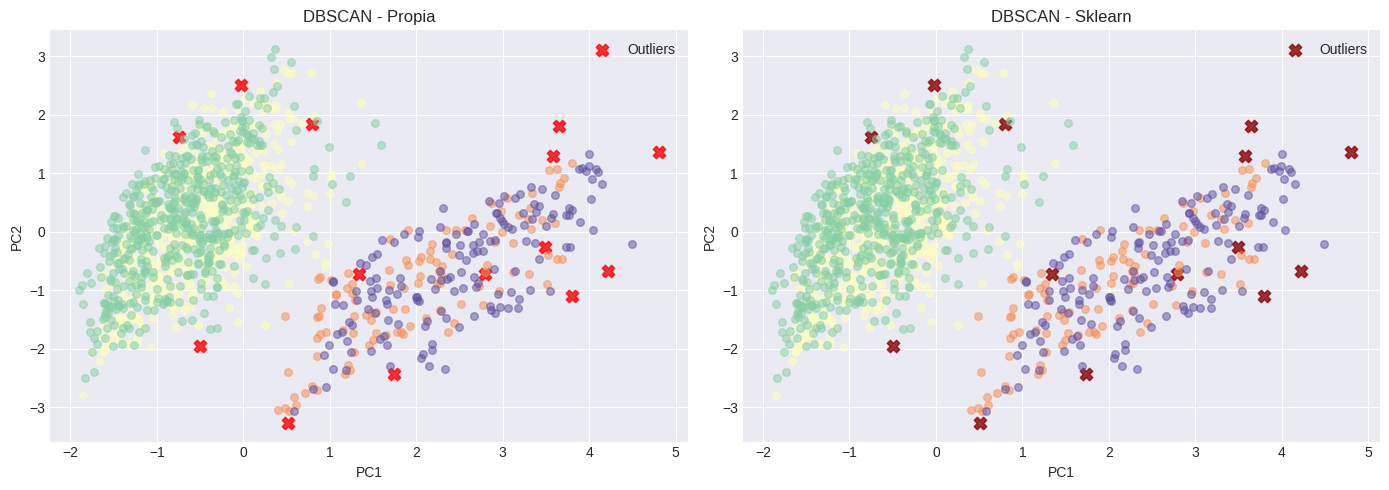

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

unique_labels_custom = np.unique(labels_dbscan_custom)
colors_custom = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_custom)))

for label, color in zip(unique_labels_custom, colors_custom):
    if label == -1:
        axes[0].scatter(X_pca[labels_dbscan_custom == label, 0], 
                       X_pca[labels_dbscan_custom == label, 1],
                       c='red', alpha=0.8, s=80, label='Outliers', marker='X')
    else:
        axes[0].scatter(X_pca[labels_dbscan_custom == label, 0], 
                       X_pca[labels_dbscan_custom == label, 1],
                       c=[color], alpha=0.5, s=30)

axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('DBSCAN - Propia')
axes[0].legend()

unique_labels_sklearn = np.unique(labels_dbscan_sklearn)
colors_sklearn = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_sklearn)))

for label, color in zip(unique_labels_sklearn, colors_sklearn):
    if label == -1:
        axes[1].scatter(X_pca[labels_dbscan_sklearn == label, 0], 
                       X_pca[labels_dbscan_sklearn == label, 1],
                       c='darkred', alpha=0.8, s=80, label='Outliers', marker='X')
    else:
        axes[1].scatter(X_pca[labels_dbscan_sklearn == label, 0], 
                       X_pca[labels_dbscan_sklearn == label, 1],
                       c=[color], alpha=0.5, s=30)

axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('DBSCAN - Sklearn')
axes[1].legend()

plt.tight_layout()
plt.show()


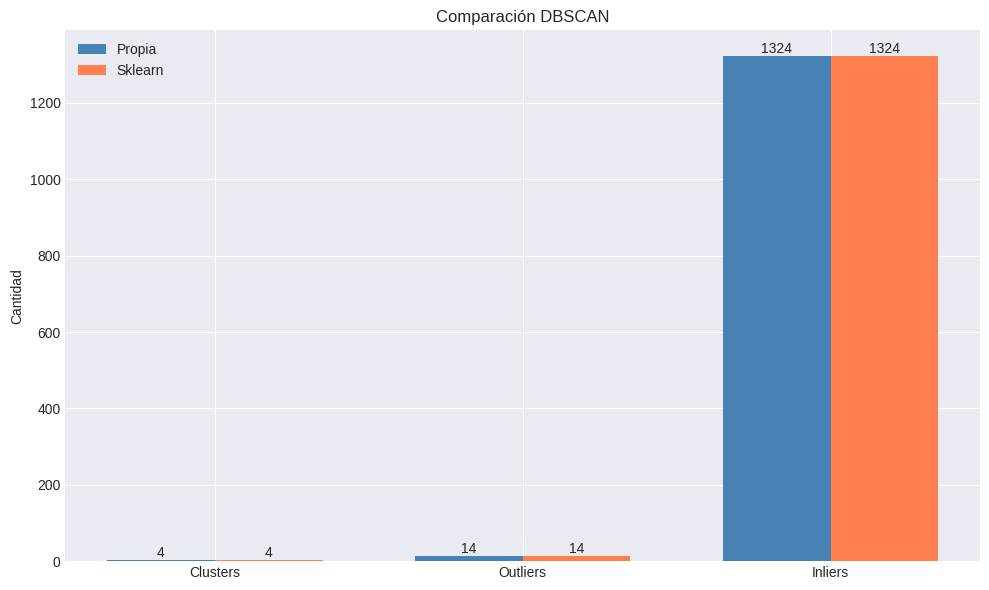

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Clusters', 'Outliers', 'Inliers']
custom_vals = [n_clusters_custom, len(outliers_custom), len(X_scaled) - len(outliers_custom)]
sklearn_vals = [n_clusters_sklearn, len(outliers_sklearn), len(X_scaled) - len(outliers_sklearn)]

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, custom_vals, width, label='Propia', color='steelblue')
bars2 = ax.bar(x + width/2, sklearn_vals, width, label='Sklearn', color='coral')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
                ha='center', va='bottom')

ax.set_ylabel('Cantidad')
ax.set_title('Comparación DBSCAN')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()
